In [13]:
# to import the data that will be used later
import numpy as np
import pandas as pd

# read the data in the file and set the columns for these data
# data = pd.read_csv('dataInfo_2016_12.CSV',header=None, names=["date_time", "id","number"])
data = pd.read_csv('dataInfo_2017.CSV',header=None, names=["date_time", "id","number"])

In [14]:
# to show part of the data that readed from the file
data.head()

,date_time,id,number
0,2017/1/1 0:00,960111FF07FF104A,514286.406
1,2017/1/1 0:00,960111FF07FF127E,0.000
2,2017/1/1 0:00,960111FF07FF127F,0.000
3,2017/1/1 0:00,960111FF07FF1280,0.000
4,2017/1/1 0:00,960111FF07FF128E,0.000


In [15]:
# for the reason that the ID in the file can be divided into two parts, the first part is the number of this particular machine, the second part is the signal which implies the situation that this data get 
data['id'], data['sub_id'] = map(data['id'].str.slice, [0, 10 ], [10, 16])

In [16]:
# to show part of the ID that have been split
data.head()

,date_time,id,number,sub_id
0,2017/1/1 0:00,960111FF07,514286.406,FF104A
1,2017/1/1 0:00,960111FF07,0.000,FF127E
2,2017/1/1 0:00,960111FF07,0.000,FF127F
3,2017/1/1 0:00,960111FF07,0.000,FF1280
4,2017/1/1 0:00,960111FF07,0.000,FF128E


In [17]:
# to get the id of all the machines in this file
unique_id = data['id'].unique()
# print all the unique id
print('all ids for machines are as follows： \n',unique_id)
# print all the rows of the id of this file
print(data['id'])

all ids for machines are as follows： 
 ['960111FF07' '9601340000' '9601340101' '9601340102' '960111FF02'
 '960111FF03' '9601320B01' '960111FF04' '960111FF01' '9601210301'
 '9601430A01' '960111FF06' '960112FF01' '9601210302']
0          960111FF07
1          960111FF07
2          960111FF07
3          960111FF07
4          960111FF07
5          9601340000
6          9601340000
7          9601340000
8          9601340000
9          9601340000
10         9601340000
11         9601340000
12         9601340000
13         9601340000
14         9601340000
15         9601340101
16         9601340101
17         9601340101
18         9601340101
19         9601340101
20         9601340101
21         9601340000
22         9601340000
23         9601340000
24         9601340000
25         9601340000
26         9601340000
27         9601340000
28         9601340000
29         9601340000
              ...    
1048546    960111FF04
1048547    960111FF04
1048548    960111FF03
1048549    960111FF02
10485

In [18]:
# to get all the data of one particular machine 
Data=data[(data['id']=='960111FF01') & (data['sub_id']=='FF10DB')]
Data.head()

,date_time,id,number,sub_id
361,2017/1/1 0:16,960111FF01,24.920000,FF10DB
1492,2017/1/1 1:16,960111FF01,23.959999,FF10DB
2526,2017/1/1 2:16,960111FF01,22.639999,FF10DB
3687,2017/1/1 3:17,960111FF01,23.040001,FF10DB
4805,2017/1/1 4:17,960111FF01,22.280001,FF10DB


In [19]:
# to put all the data into a csv file
Data.to_csv('Data.csv')

In [20]:
# to get the data for this particular machine into csv file called "Data_2017.csv"
data = pd.read_csv('dataInfo_2017.CSV',header=None, names=["date_time", "id","number"])
Data_2017=data[(data['id']=='960111FF01FF10DB')]
Data_2017.to_csv('Data_2017.csv')

In [22]:
Data = pd.read_csv('Data_2017.csv')
Data['date'] = pd.to_datetime(Data['date_time'], format='%Y-%m-%d')
Data=Data.set_index(['date'])
Data=Data.loc[:,'number']
print(Data.head())
# print(N_cur.dtypes)
# print(N_cur.index)

date
2017-01-01 00:16:00    24.920000
2017-01-01 01:16:00    23.959999
2017-01-01 02:16:00    22.639999
2017-01-01 03:17:00    23.040001
2017-01-01 04:17:00    22.280001
Name: number, dtype: float64


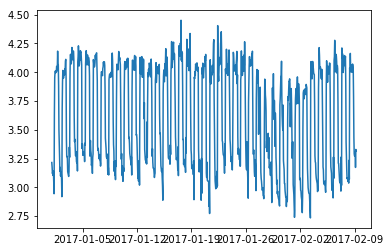

In [24]:
%matplotlib inline
# to show the general tendency of the log of the current change with the time
import matplotlib.pyplot as plt
Data_log = np.log(Data)
plt.plot(Data_log)